In [1]:
#Importar Pandas
import pandas as pd

In [2]:
#URL site O gol
url = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?grupo=0&fase=186099'

In [3]:
#Criar df via pandas
all_tables = pd.read_html(url, encoding='latin1')

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [4]:
#Identificar tabelas
all_tables[2]

,Unnamed: 0,Unnamed: 1,J,GM,GC,P
0,1,Catanduva,3,5,3,7
1,2,Athletico Paranaense,3,12,3,6
2,3,Portuguesa-RJ,3,6,4,4
3,4,Sparta-TO,3,0,13,0


In [5]:
#Todos os grupos
g_32 = all_tables[34]
g_31 = all_tables[33]
g_30 = all_tables[32]
g_29 = all_tables[31]
g_28 = all_tables[30]
g_27 = all_tables[29]
g_26 = all_tables[28]
g_25 = all_tables[27]
g_24 = all_tables[26]
g_23 = all_tables[25]
g_22 = all_tables[24]
g_21 = all_tables[23]
g_20 = all_tables[22]
g_19 = all_tables[21]
g_18 = all_tables[20]
g_17 = all_tables[19]
g_16 = all_tables[18]
g_15 = all_tables[17]
g_14 = all_tables[16]
g_13 = all_tables[15]
g_12 = all_tables[14]
g_11 = all_tables[13]
g_10 = all_tables[12]
g_9 = all_tables[11]
g_8 = all_tables[10]
g_7 = all_tables[9]
g_6 = all_tables[8]
g_5 = all_tables[7]
g_4 = all_tables[6]
g_3 = all_tables[5]
g_2 = all_tables[4]
g_1 = all_tables[3]

In [8]:
#Agrupando os Dfs
dfs = [g_30,g_29,g_28,g_27,g_26,g_25,g_24,g_23,g_22,g_21,g_20,
       g_19,g_18,g_17,g_16,g_15,g_14,g_13,g_12,g_11,g_10,g_9,g_8,g_7,g_6,
       g_5,g_4,g_3,g_2,g_1]

In [9]:
#Unir os grupos
copinha = pd.concat(dfs, axis=0, ignore_index=True)

In [10]:
copinha

,Unnamed: 0,Unnamed: 1,J,GM,GC,P
0,1,Avaí,3,5,1,9
1,2,Retrô FC,3,6,4,6
2,3,Nacional-SP,3,3,5,1
3,4,São Caetano,3,3,7,1
4,1,Coritiba,3,9,0,9
...,...,...,...,...,...,...
115,4,Inter de Bebedouro,3,5,12,0
116,1,Coimbra-MG,3,9,0,7
117,2,Mirassol,3,2,1,5
118,3,ABC,3,3,8,2


In [11]:
#Renomear as colunas
copinha.rename(columns={'Unnamed: 1': 'Time', 'J': 'Jogos', 'GM': 'Gols Pro', 'GC': 'Gols Sofrido', 'P': 'Pontos'}, inplace=True)
#Excluir Coluna Unnamed:0 
copinha.drop('Unnamed: 0', axis=1, inplace=True)
#Criar coluna Saldo de Gols
copinha['Saldo de Gols'] = copinha['Gols Pro'] - copinha['Gols Sofrido']
#Filtrar por Pontos, Saldo de Gols e Gols Pro
copinha = copinha.sort_values(by=['Pontos', 'Saldo de Gols', 'Gols Pro'], ascending=False)

copinha

,Time,Jogos,Gols Pro,Gols Sofrido,Pontos,Saldo de Gols
112,Grêmio,3,18,2,9,16
32,Palmeiras,3,15,1,9,14
24,Santos,3,12,1,9,11
20,Portuguesa,3,10,1,9,9
4,Coritiba,3,9,0,9,9
...,...,...,...,...,...,...
23,União Suzano,3,2,10,0,-8
67,Rio Branco-AC,3,0,9,0,-9
15,Potyguar Seridoense,3,0,10,0,-10
83,Santa Cruz Riachuelo,3,1,12,0,-11


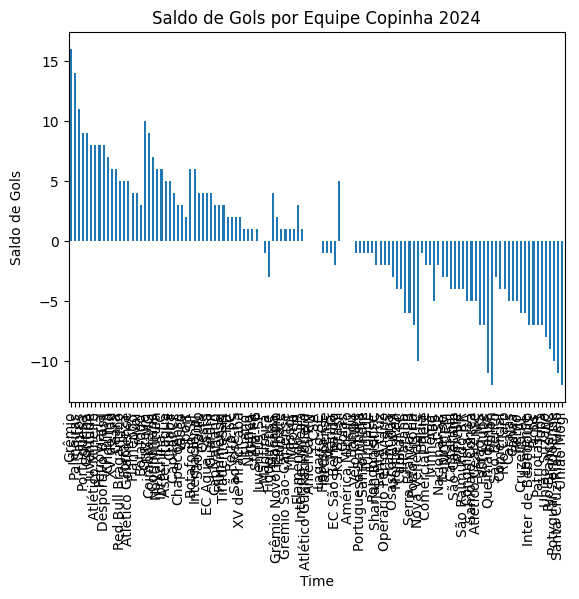

In [12]:
#Importar Bibliotecas
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
#Filtrando os dfs
gp = copinha[['Time', 'Gols Pro']]
gc = copinha[['Time', 'Gols Sofrido']]
sg = copinha[['Time', 'Saldo de Gols']]
#Plotando o gráfico
sg.plot(x='Time', y='Saldo de Gols', kind='bar', legend=False)
plt.title('Saldo de Gols por Equipe Copinha 2024')
plt.xlabel('Time')
plt.ylabel('Saldo de Gols')
plt.show()

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\44531812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_gp, x='Time', y='Gols Pro', palette='icefire')
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\44531812.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


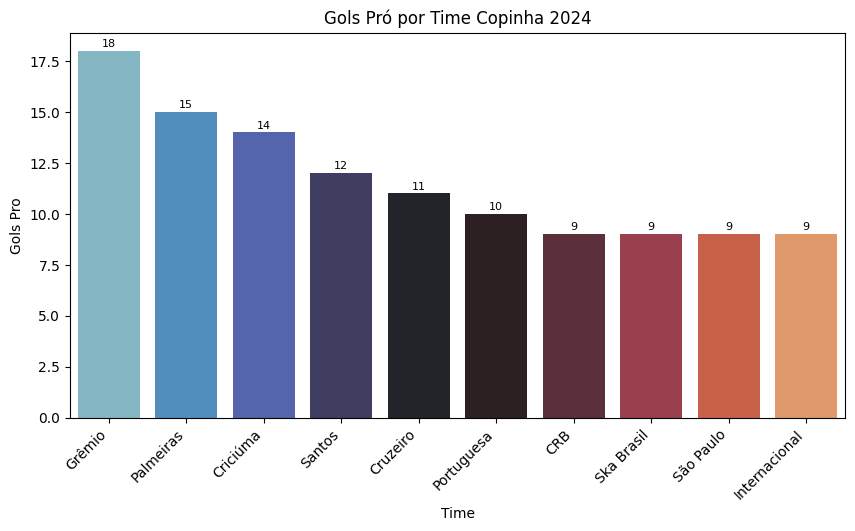

In [13]:
# Criar o gráfico usando seaborn
#Gols Pró
top_gp = gp.sort_values(by='Gols Pro', ascending=False).head(10)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_gp, x='Time', y='Gols Pro', palette='icefire')  

# Adicionar título ao gráfico
plt.title('Gols Pró por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_gp['Gols Pro']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Exibir o gráfico
plt.show()

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2352899553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_gc, x='Time', y='Gols Sofrido', palette='dark')
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2352899553.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


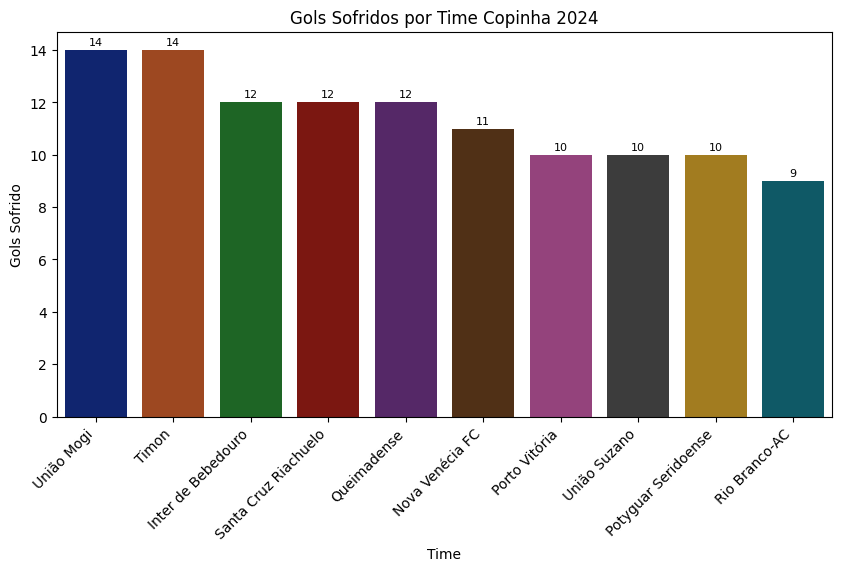

In [14]:
# Criar o gráfico usando seaborn
#Gols Sofridos

top_gc = gc.sort_values(by='Gols Sofrido', ascending=False).head(10)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_gc, x='Time', y='Gols Sofrido', palette='dark')  

# Adicionar título ao gráfico
plt.title('Gols Sofridos por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_gc['Gols Sofrido']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Exibir o gráfico
plt.show()

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1682194606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_sg, x='Time', y='Saldo de Gols', palette='Spectral')


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1682194606.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


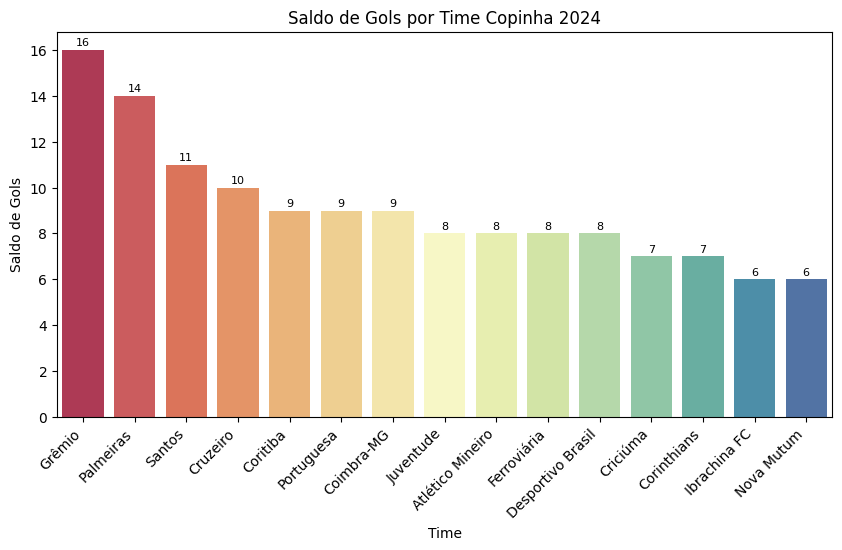

In [15]:
# Criar o gráfico usando seaborn
#Saldo de Gols

top_sg = sg.sort_values(by='Saldo de Gols', ascending=False).head(15)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_sg, x='Time', y='Saldo de Gols', palette='Spectral')  

# Adicionar título ao gráfico
plt.title('Saldo de Gols por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_sg['Saldo de Gols']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Exibir o gráfico
plt.show()

## Analisar a 1a fase de mata mata

In [16]:
url_mata = ('https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186101')

In [17]:
mata_tables = pd.read_html(url_mata, encoding='latin1')

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [18]:
pri_fase = mata_tables[1].copy()

In [19]:
pri_fase

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/12,Tanabi,1-1 (1-4 Pen.),Athletico Paranaense,NaN,NaN,NaN,NaN
1,NaN,Desportivo Brasil,2-2 (3-5 Pen.),América Mineiro,NaN,NaN,NaN,NaN
2,NaN,Chapecoense,4-4 (4-5 Pen.),Tiradentes-PI,NaN,NaN,NaN,NaN
3,NaN,Fortaleza,4-0,Internacional,NaN,NaN,NaN,NaN
4,NaN,Capital CF,4-0,Capivariano,NaN,NaN,NaN,NaN
5,NaN,Coimbra-MG,1-1 (3-2 Pen.),Figueirense,NaN,NaN,NaN,NaN
6,NaN,Fluminense,2-3,Ituano,NaN,NaN,NaN,NaN
7,NaN,Corinthians,2-2 (5-4 Pen.),Guarani,NaN,NaN,NaN,NaN
8,NaN,Criciúma,2-1,Grêmio São-Carlense,NaN,NaN,NaN,NaN
9,NaN,Ferroviária,3-2,Gama,NaN,NaN,NaN,NaN


In [20]:
#Renomear as colunas
pri_fase.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
pri_fase.drop(cols_drop, axis=1, inplace=True)
pri_fase_penalt = pri_fase.copy()
pri_fase

,Time_A,Resultado,Time_B
0,Tanabi,1-1 (1-4 Pen.),Athletico Paranaense
1,Desportivo Brasil,2-2 (3-5 Pen.),América Mineiro
2,Chapecoense,4-4 (4-5 Pen.),Tiradentes-PI
3,Fortaleza,4-0,Internacional
4,Capital CF,4-0,Capivariano
5,Coimbra-MG,1-1 (3-2 Pen.),Figueirense
6,Fluminense,2-3,Ituano
7,Corinthians,2-2 (5-4 Pen.),Guarani
8,Criciúma,2-1,Grêmio São-Carlense
9,Ferroviária,3-2,Gama


In [21]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'

    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
pri_fase_penalt['Vencedor_Penaltis'] = pri_fase_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(pri_fase_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Tanabi,1-1 (1-4 Pen.),Athletico Paranaense,Time_B
1,Desportivo Brasil,2-2 (3-5 Pen.),América Mineiro,Time_B
2,Chapecoense,4-4 (4-5 Pen.),Tiradentes-PI,Time_B
3,Fortaleza,4-0,Internacional,Sem decisão nos pênaltis
4,Capital CF,4-0,Capivariano,Sem decisão nos pênaltis
5,Coimbra-MG,1-1 (3-2 Pen.),Figueirense,Time_A
6,Fluminense,2-3,Ituano,Sem decisão nos pênaltis
7,Corinthians,2-2 (5-4 Pen.),Guarani,Time_A
8,Criciúma,2-1,Grêmio São-Carlense,Sem decisão nos pênaltis
9,Ferroviária,3-2,Gama,Sem decisão nos pênaltis


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1873603892.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')


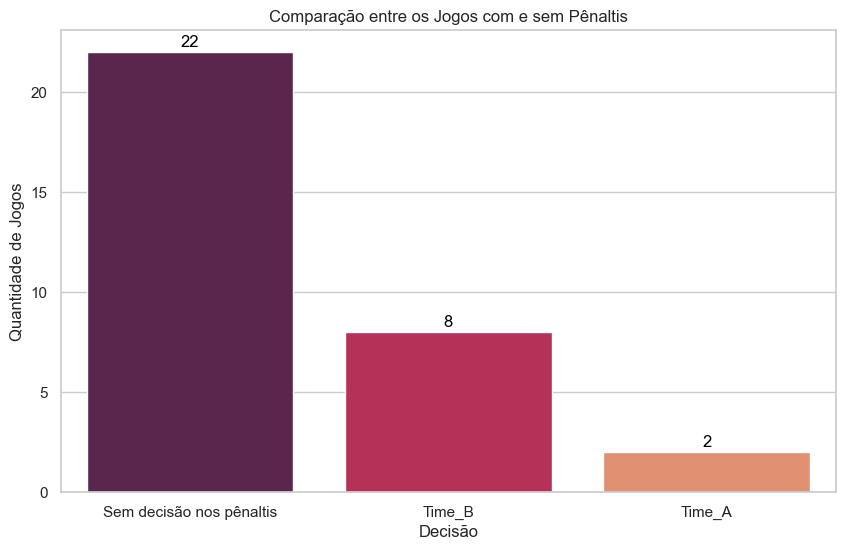

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de jogos que foram para os pênaltis e os que não tiveram
penalty_counts = pri_fase_penalt['Vencedor_Penaltis'].value_counts()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')
plt.title('Comparação entre os Jogos com e sem Pênaltis')
plt.xlabel('Decisão')
plt.ylabel('Quantidade de Jogos')

# Adicionar os números centralizados nas barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.show()

In [23]:
#Limpar as informações de Penalts
import re
pri_fase['Resultado'] = pri_fase['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))
pri_fase

,Time_A,Resultado,Time_B
0,Tanabi,1-1,Athletico Paranaense
1,Desportivo Brasil,2-2,América Mineiro
2,Chapecoense,4-4,Tiradentes-PI
3,Fortaleza,4-0,Internacional
4,Capital CF,4-0,Capivariano
5,Coimbra-MG,1-1,Figueirense
6,Fluminense,2-3,Ituano
7,Corinthians,2-2,Guarani
8,Criciúma,2-1,Grêmio São-Carlense
9,Ferroviária,3-2,Gama


In [24]:
#Separar os gols do time A e do time B para criar o Ranking
pri_fase[['Gols_A', 'Gols_B']] = pri_fase['Resultado'].str.split('-', expand=True)
display(pri_fase)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Tanabi,1-1,Athletico Paranaense,1,1
1,Desportivo Brasil,2-2,América Mineiro,2,2
2,Chapecoense,4-4,Tiradentes-PI,4,4
3,Fortaleza,4-0,Internacional,4,0
4,Capital CF,4-0,Capivariano,4,0
5,Coimbra-MG,1-1,Figueirense,1,1
6,Fluminense,2-3,Ituano,2,3
7,Corinthians,2-2,Guarani,2,2
8,Criciúma,2-1,Grêmio São-Carlense,2,1
9,Ferroviária,3-2,Gama,3,2


In [25]:
time_a = pri_fase[['Time_A', 'Gols_A', 'Gols_B']]
time_b = pri_fase[['Time_B', 'Gols_B', 'Gols_A']]

In [26]:
time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2057639409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2057639409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


In [27]:
gols_pri_mata = pd.concat([time_a, time_b], ignore_index=True)
gols_pri_mata

,Time,Gols Pro,Gols Contra
0,Tanabi,1,1
1,Desportivo Brasil,2,2
2,Chapecoense,4,4
3,Fortaleza,4,0
4,Capital CF,4,0
...,...,...,...
59,Sport,1,3
60,Sfera FC,1,0
61,EC São Bernardo,0,4
62,Madureira,0,1


### Atualizar a tabela com jogos do mata mata

In [28]:
tab_aux = pd.merge(copinha, gols_pri_mata, on='Time', how='left')
tab_aux

,Time,Jogos,Gols Pro_x,Gols Sofrido,Pontos,Saldo de Gols,Gols Pro_y,Gols Contra
0,Grêmio,3,18,2,9,16,4,1
1,Palmeiras,3,15,1,9,14,3,1
2,Santos,3,12,1,9,11,4,0
3,Portuguesa,3,10,1,9,9,2,0
4,Coritiba,3,9,0,9,9,1,0
...,...,...,...,...,...,...,...,...
115,União Suzano,3,2,10,0,-8,NaN,NaN
116,Rio Branco-AC,3,0,9,0,-9,NaN,NaN
117,Potyguar Seridoense,3,0,10,0,-10,NaN,NaN
118,Santa Cruz Riachuelo,3,1,12,0,-11,NaN,NaN


In [29]:
# Substituir NaN por 0 nas colunas 'Gols Pro_x' e 'Gols Pro_y'
tab_aux['Gols Pro_x'].fillna(0, inplace=True)
tab_aux['Gols Pro_y'].fillna(0, inplace=True)
tab_aux['Gols Pro_x'] = tab_aux['Gols Pro_x'].astype(int)
tab_aux['Gols Pro_y'] = tab_aux['Gols Pro_y'].astype(int)

In [30]:
#Fazer a soma dos gols pró
# Somar as colunas 'Gols Pro_x' e 'Gols Pro_y' e criar a nova coluna 'Gols Pro Total'
tab_aux['Gols Pro Total'] = tab_aux['Gols Pro_x'] + tab_aux['Gols Pro_y']
tab_aux

,Time,Jogos,Gols Pro_x,Gols Sofrido,Pontos,Saldo de Gols,Gols Pro_y,Gols Contra,Gols Pro Total
0,Grêmio,3,18,2,9,16,4,1,22
1,Palmeiras,3,15,1,9,14,3,1,18
2,Santos,3,12,1,9,11,4,0,16
3,Portuguesa,3,10,1,9,9,2,0,12
4,Coritiba,3,9,0,9,9,1,0,10
...,...,...,...,...,...,...,...,...,...
115,União Suzano,3,2,10,0,-8,0,NaN,2
116,Rio Branco-AC,3,0,9,0,-9,0,NaN,0
117,Potyguar Seridoense,3,0,10,0,-10,0,NaN,0
118,Santa Cruz Riachuelo,3,1,12,0,-11,0,NaN,1


In [31]:
# Substituir NaN por 0 nas colunas 
tab_aux['Gols Sofrido'].fillna(0, inplace=True)
tab_aux['Gols Contra'].fillna(0, inplace=True)
tab_aux['Gols Sofrido'] = tab_aux['Gols Sofrido'].astype(int)
tab_aux['Gols Contra'] = tab_aux['Gols Contra'].astype(int)

In [32]:
#Fazer a soma dos gols contra
# Somar as colunas 'Gols Sofrido' e 'Gols Contra' e criar a nova coluna 'Gols Sofrido Total'
tab_aux['Gols Sofrido Total'] = tab_aux['Gols Sofrido'] + tab_aux['Gols Contra']
tab_aux

,Time,Jogos,Gols Pro_x,Gols Sofrido,Pontos,Saldo de Gols,Gols Pro_y,Gols Contra,Gols Pro Total,Gols Sofrido Total
0,Grêmio,3,18,2,9,16,4,1,22,3
1,Palmeiras,3,15,1,9,14,3,1,18,2
2,Santos,3,12,1,9,11,4,0,16,1
3,Portuguesa,3,10,1,9,9,2,0,12,1
4,Coritiba,3,9,0,9,9,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...
115,União Suzano,3,2,10,0,-8,0,0,2,10
116,Rio Branco-AC,3,0,9,0,-9,0,0,0,9
117,Potyguar Seridoense,3,0,10,0,-10,0,0,0,10
118,Santa Cruz Riachuelo,3,1,12,0,-11,0,0,1,12


In [33]:
#Fazer o saldo de gols
# Criar a coluna Saldo de Gols Total 
tab_aux['Saldo de Gols Total'] = tab_aux['Gols Pro Total'] - tab_aux['Gols Sofrido Total']
tab_aux

,Time,Jogos,Gols Pro_x,Gols Sofrido,Pontos,Saldo de Gols,Gols Pro_y,Gols Contra,Gols Pro Total,Gols Sofrido Total,Saldo de Gols Total
0,Grêmio,3,18,2,9,16,4,1,22,3,19
1,Palmeiras,3,15,1,9,14,3,1,18,2,16
2,Santos,3,12,1,9,11,4,0,16,1,15
3,Portuguesa,3,10,1,9,9,2,0,12,1,11
4,Coritiba,3,9,0,9,9,1,0,10,0,10
...,...,...,...,...,...,...,...,...,...,...,...
115,União Suzano,3,2,10,0,-8,0,0,2,10,-8
116,Rio Branco-AC,3,0,9,0,-9,0,0,0,9,-9
117,Potyguar Seridoense,3,0,10,0,-10,0,0,0,10,-10
118,Santa Cruz Riachuelo,3,1,12,0,-11,0,0,1,12,-11


In [34]:
#Filtrando as colunas
tab_aux = tab_aux[['Time', 'Jogos', 'Gols Pro Total', 'Gols Sofrido Total', 'Saldo de Gols Total']]
tab_aux

,Time,Jogos,Gols Pro Total,Gols Sofrido Total,Saldo de Gols Total
0,Grêmio,3,22,3,19
1,Palmeiras,3,18,2,16
2,Santos,3,16,1,15
3,Portuguesa,3,12,1,11
4,Coritiba,3,10,0,10
...,...,...,...,...,...
115,União Suzano,3,2,10,-8
116,Rio Branco-AC,3,0,9,-9
117,Potyguar Seridoense,3,0,10,-10
118,Santa Cruz Riachuelo,3,1,12,-11


In [35]:
#Fazer o Update do df copinha
tab_aux.rename(columns={'Time': 'Time', 'Jogos': 'Jogos', 'Gols Pro Total': 'Gols Pro', 'Gols Sofrido Total': 'Gols Sofrido',
                        'Saldo de Gols Total': 'Saldo de Gols'}, inplace=True)
tab_aux

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3324665358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_aux.rename(columns={'Time': 'Time', 'Jogos': 'Jogos', 'Gols Pro Total': 'Gols Pro', 'Gols Sofrido Total': 'Gols Sofrido',


,Time,Jogos,Gols Pro,Gols Sofrido,Saldo de Gols
0,Grêmio,3,22,3,19
1,Palmeiras,3,18,2,16
2,Santos,3,16,1,15
3,Portuguesa,3,12,1,11
4,Coritiba,3,10,0,10
...,...,...,...,...,...
115,União Suzano,3,2,10,-8
116,Rio Branco-AC,3,0,9,-9
117,Potyguar Seridoense,3,0,10,-10
118,Santa Cruz Riachuelo,3,1,12,-11


In [36]:
#Limpar dos dados para a previsão
pri_fase = pri_fase.drop(columns=['Resultado'])

In [37]:
pri_fase['Gols_A'] = pri_fase['Gols_A'].astype(int)
pri_fase['Gols_B'] = pri_fase['Gols_B'].astype(int) 
pri_fase

,Time_A,Time_B,Gols_A,Gols_B
0,Tanabi,Athletico Paranaense,1,1
1,Desportivo Brasil,América Mineiro,2,2
2,Chapecoense,Tiradentes-PI,4,4
3,Fortaleza,Internacional,4,0
4,Capital CF,Capivariano,4,0
5,Coimbra-MG,Figueirense,1,1
6,Fluminense,Ituano,2,3
7,Corinthians,Guarani,2,2
8,Criciúma,Grêmio São-Carlense,2,1
9,Ferroviária,Gama,3,2


In [38]:
# Aplica a função melt para empilhar os times A e B e seus respectivos gols
gols_pri_fase = pri_fase.melt(id_vars=['Time_A', 'Time_B'], value_vars=['Gols_A', 'Gols_B'], var_name='Tipo', value_name='Gols')

# Cria uma nova coluna 'Times' que contém os times A e B
gols_pri_fase['Time'] = gols_pri_fase.apply(lambda row: row['Time_A'] if 'A' in row['Tipo'] else row['Time_B'], axis=1)

# Exclui as colunas 'Time_A' e 'Time_B' que não são mais necessárias
gols_pri_fase = gols_pri_fase.drop(['Time_A', 'Time_B'], axis=1)

# Reorganiza as colunas para que 'Times' seja a primeira
gols_pri_fase = gols_pri_fase[['Time', 'Gols']]

# Exibe o DataFrame resultante
display(gols_pri_fase)


,Time,Gols
0,Tanabi,1
1,Desportivo Brasil,2
2,Chapecoense,4
3,Fortaleza,4
4,Capital CF,4
...,...,...
59,Sport,1
60,Sfera FC,1
61,EC São Bernardo,0
62,Madureira,0


In [39]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'
        else:
            return 'Empate nos pênaltis'
    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
pri_fase_penalt['Vencedor_Penaltis'] = pri_fase_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(pri_fase_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Tanabi,1-1 (1-4 Pen.),Athletico Paranaense,Time_B
1,Desportivo Brasil,2-2 (3-5 Pen.),América Mineiro,Time_B
2,Chapecoense,4-4 (4-5 Pen.),Tiradentes-PI,Time_B
3,Fortaleza,4-0,Internacional,Sem decisão nos pênaltis
4,Capital CF,4-0,Capivariano,Sem decisão nos pênaltis
5,Coimbra-MG,1-1 (3-2 Pen.),Figueirense,Time_A
6,Fluminense,2-3,Ituano,Sem decisão nos pênaltis
7,Corinthians,2-2 (5-4 Pen.),Guarani,Time_A
8,Criciúma,2-1,Grêmio São-Carlense,Sem decisão nos pênaltis
9,Ferroviária,3-2,Gama,Sem decisão nos pênaltis


In [40]:
# Filtra as linhas que não têm 'Sem decisão nos pênaltis'
df_filtrado = pri_fase_penalt.loc[pri_fase_penalt['Vencedor_Penaltis'] != 'Sem decisão nos pênaltis']
df_filtrado

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Tanabi,1-1 (1-4 Pen.),Athletico Paranaense,Time_B
1,Desportivo Brasil,2-2 (3-5 Pen.),América Mineiro,Time_B
2,Chapecoense,4-4 (4-5 Pen.),Tiradentes-PI,Time_B
5,Coimbra-MG,1-1 (3-2 Pen.),Figueirense,Time_A
7,Corinthians,2-2 (5-4 Pen.),Guarani,Time_A
13,XV de Jaú,0-0 (2-3 Pen.),CRB,Time_B
14,Ceará,1-1 (2-4 Pen.),São Paulo,Time_B
15,Catanduva,1-1 (4-5 Pen.),Ponte Preta,Time_B
22,XV de Piracicaba,1-1 (5-6 Pen.),São José-RS,Time_B
24,Red Bull Bragantino,0-0 (3-4 Pen.),Taubaté,Time_B


In [41]:
def substituir_times(row):
    if row['Vencedor_Penaltis'] == 'Time_A':
        return row['Time_A']
    elif row['Vencedor_Penaltis'] == 'Time_B':
        return row['Time_B']
    else:
        return None  # Trate qualquer outro caso conforme sua necessidade

# Aplica a função para criar uma nova coluna 'Vencedor_Final'
df_filtrado['Vencedor_Final'] = df_filtrado.apply(substituir_times, axis=1)

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3827036955.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Vencedor_Final'] = df_filtrado.apply(substituir_times, axis=1)


In [42]:
df_filtrado['Resultado'] = df_filtrado['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))
df_filtrado

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3764153658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Resultado'] = df_filtrado['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))


,Time_A,Resultado,Time_B,Vencedor_Penaltis,Vencedor_Final
0,Tanabi,1-1,Athletico Paranaense,Time_B,Athletico Paranaense
1,Desportivo Brasil,2-2,América Mineiro,Time_B,América Mineiro
2,Chapecoense,4-4,Tiradentes-PI,Time_B,Tiradentes-PI
5,Coimbra-MG,1-1,Figueirense,Time_A,Coimbra-MG
7,Corinthians,2-2,Guarani,Time_A,Corinthians
13,XV de Jaú,0-0,CRB,Time_B,CRB
14,Ceará,1-1,São Paulo,Time_B,São Paulo
15,Catanduva,1-1,Ponte Preta,Time_B,Ponte Preta
22,XV de Piracicaba,1-1,São José-RS,Time_B,São José-RS
24,Red Bull Bragantino,0-0,Taubaté,Time_B,Taubaté


In [43]:
#Separar os gols do time A e do time B para criar o Ranking
df_filtrado[['Gols_A', 'Gols_B']] = df_filtrado['Resultado'].str.split('-', expand=True)
display(df_filtrado)

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\923505703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[['Gols_A', 'Gols_B']] = df_filtrado['Resultado'].str.split('-', expand=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\923505703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[['Gols_A', 'Gols_B']] = df_filtrado['Resultado'].str.split('-', expand=True)


,Time_A,Resultado,Time_B,Vencedor_Penaltis,Vencedor_Final,Gols_A,Gols_B
0,Tanabi,1-1,Athletico Paranaense,Time_B,Athletico Paranaense,1,1
1,Desportivo Brasil,2-2,América Mineiro,Time_B,América Mineiro,2,2
2,Chapecoense,4-4,Tiradentes-PI,Time_B,Tiradentes-PI,4,4
5,Coimbra-MG,1-1,Figueirense,Time_A,Coimbra-MG,1,1
7,Corinthians,2-2,Guarani,Time_A,Corinthians,2,2
13,XV de Jaú,0-0,CRB,Time_B,CRB,0,0
14,Ceará,1-1,São Paulo,Time_B,São Paulo,1,1
15,Catanduva,1-1,Ponte Preta,Time_B,Ponte Preta,1,1
22,XV de Piracicaba,1-1,São José-RS,Time_B,São José-RS,1,1
24,Red Bull Bragantino,0-0,Taubaté,Time_B,Taubaté,0,0


In [44]:
# Função para calcular o vencedor final e os gols correspondentes
def calcular_resultados(row):
    if row['Vencedor_Penaltis'] == 'Time_A':
        return row['Vencedor_Final'], row['Gols_A']
    elif row['Vencedor_Penaltis'] == 'Time_B':
        return row['Vencedor_Final'], row['Gols_B']
    else:
        return None, None  # Trate qualquer outro caso conforme sua necessidade

# Aplica a função para criar duas novas colunas 'Vencedor_Final_Real' e 'Gols_Real'
df_filtrado['Vencedor_Final_Real'], df_filtrado['Gols_Real'] = zip(*df_filtrado.apply(calcular_resultados, axis=1))
display(df_filtrado)

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1257017701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Vencedor_Final_Real'], df_filtrado['Gols_Real'] = zip(*df_filtrado.apply(calcular_resultados, axis=1))
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1257017701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Vencedor_Final_Real'], df_filtrado['Gols_Real'] = zip(*df_filtrado.apply(calcular_resultados, axis=1))


,Time_A,Resultado,Time_B,Vencedor_Penaltis,Vencedor_Final,Gols_A,Gols_B,Vencedor_Final_Real,Gols_Real
0,Tanabi,1-1,Athletico Paranaense,Time_B,Athletico Paranaense,1,1,Athletico Paranaense,1
1,Desportivo Brasil,2-2,América Mineiro,Time_B,América Mineiro,2,2,América Mineiro,2
2,Chapecoense,4-4,Tiradentes-PI,Time_B,Tiradentes-PI,4,4,Tiradentes-PI,4
5,Coimbra-MG,1-1,Figueirense,Time_A,Coimbra-MG,1,1,Coimbra-MG,1
7,Corinthians,2-2,Guarani,Time_A,Corinthians,2,2,Corinthians,2
13,XV de Jaú,0-0,CRB,Time_B,CRB,0,0,CRB,0
14,Ceará,1-1,São Paulo,Time_B,São Paulo,1,1,São Paulo,1
15,Catanduva,1-1,Ponte Preta,Time_B,Ponte Preta,1,1,Ponte Preta,1
22,XV de Piracicaba,1-1,São José-RS,Time_B,São José-RS,1,1,São José-RS,1
24,Red Bull Bragantino,0-0,Taubaté,Time_B,Taubaté,0,0,Taubaté,0


In [45]:
times_penalt_1 = df_filtrado[['Vencedor_Final_Real', 'Gols_Real']]
times_penalt_1['Gols_Real'] = times_penalt_1['Gols_Real'].astype(int)
times_penalt_1

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1317623612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_penalt_1['Gols_Real'] = times_penalt_1['Gols_Real'].astype(int)


,Vencedor_Final_Real,Gols_Real
0,Athletico Paranaense,1
1,América Mineiro,2
2,Tiradentes-PI,4
5,Coimbra-MG,1
7,Corinthians,2
13,CRB,0
14,São Paulo,1
15,Ponte Preta,1
22,São José-RS,1
24,Taubaté,0


In [46]:
# Calcular ranking nas fases de mata-mata
peso_penalt = 0.5
times_penalt_1['Ranking'] = times_penalt_1['Gols_Real'] * peso_penalt

times_penalt_1

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1998128899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_penalt_1['Ranking'] = times_penalt_1['Gols_Real'] * peso_penalt


,Vencedor_Final_Real,Gols_Real,Ranking
0,Athletico Paranaense,1,0.5
1,América Mineiro,2,1.0
2,Tiradentes-PI,4,2.0
5,Coimbra-MG,1,0.5
7,Corinthians,2,1.0
13,CRB,0,0.0
14,São Paulo,1,0.5
15,Ponte Preta,1,0.5
22,São José-RS,1,0.5
24,Taubaté,0,0.0


In [47]:
times_penalt_1 = times_penalt_1[['Vencedor_Final_Real', 'Ranking']].rename(columns={'Vencedor_Final_Real': 'Time', 'Ranking': 'Ranking'})
times_penalt_1

,Time,Ranking
0,Athletico Paranaense,0.5
1,América Mineiro,1.0
2,Tiradentes-PI,2.0
5,Coimbra-MG,0.5
7,Corinthians,1.0
13,CRB,0.0
14,São Paulo,0.5
15,Ponte Preta,0.5
22,São José-RS,0.5
24,Taubaté,0.0


In [48]:
ranking_aux.update(times_penalt_1)
ranking_aux

NameError: name 'ranking_aux' is not defined

In [49]:
# Remover linhas duplicadas nos dois DataFrames
ranking_grupo = ranking_grupo.drop_duplicates(subset='Time')
ranking_aux = ranking_aux.drop_duplicates(subset='Time')

# Merge dos DataFrames com base no nome do time
merged_ranking = pd.merge(ranking_grupo, ranking_aux, on='Time', suffixes=('_grupo', '_aux'))

# Calcula a coluna 'Ranking_Final'
merged_ranking['Ranking_Final'] = merged_ranking['Ranking_grupo'] + merged_ranking['Ranking_aux']

# Exibe o DataFrame resultante
display(merged_ranking[['Time', 'Ranking_grupo', 'Ranking_aux', 'Ranking_Final']])


NameError: name 'ranking_grupo' is not defined

In [50]:
tab_aux['Mediana_Pro'] = tab_aux[['Jogos', 'Gols Pro']].median(axis=1)
tab_aux['Mediana_Contra'] = tab_aux[['Jogos', 'Gols Sofrido']].median(axis=1)

tab_aux

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\602089634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_aux['Mediana_Pro'] = tab_aux[['Jogos', 'Gols Pro']].median(axis=1)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\602089634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_aux['Mediana_Contra'] = tab_aux[['Jogos', 'Gols Sofrido']].median(axis=1)


,Time,Jogos,Gols Pro,Gols Sofrido,Saldo de Gols,Mediana_Pro,Mediana_Contra
0,Grêmio,3,22,3,19,12.5,3.0
1,Palmeiras,3,18,2,16,10.5,2.5
2,Santos,3,16,1,15,9.5,2.0
3,Portuguesa,3,12,1,11,7.5,2.0
4,Coritiba,3,10,0,10,6.5,1.5
...,...,...,...,...,...,...,...
115,União Suzano,3,2,10,-8,2.5,6.5
116,Rio Branco-AC,3,0,9,-9,1.5,6.0
117,Potyguar Seridoense,3,0,10,-10,1.5,6.5
118,Santa Cruz Riachuelo,3,1,12,-11,2.0,7.5


### Pegando as chaves

In [51]:
url_mata_3 = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186095'

In [52]:
#Criar df via pandas
mata_3 = pd.read_html(url_mata_3, encoding='latin1')
mata_3

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


[                    0                         1                         2  \
 0        Liga Inglesa    Erling Haaland 16 Gols         Liverpool +2 Pts.   
 1      Liga Espanhola   Jude Bellingham 16 Gols       Real Madrid +5 Pts.   
 2       Liga Italiana  Lautaro Martínez 19 Gols    Internazionale +7 Pts.   
 3          Bundesliga        Harry Kane 24 Gols  Bayer Leverkusen +5 Pts.   
 4  Campeonato Francês     Kylian Mbappé 20 Gols         Paris SG +11 Pts.   
 
                          3  
 0  2 Empates Menos Empates  
 1  3 Empates Menos Empates  
 2  3 Empates Menos Empates  
 3  1 Empates Menos Empates  
 4  3 Empates Menos Empates  ,
     Unnamed: 0            Unnamed: 1      Unnamed: 2              Unnamed: 3  \
 0   2024/01/14            Capital CF             0-2         América Mineiro   
 1          NaN  Grêmio Novorizontino             3-0           Tiradentes-PI   
 2          NaN   Atlético Goianiense             1-4             Corinthians   
 3          NaN          

In [53]:
chave_3 = mata_3[1]
chave_3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/14,Capital CF,0-2,América Mineiro,NaN,NaN,NaN,NaN
1,NaN,Grêmio Novorizontino,3-0,Tiradentes-PI,NaN,NaN,NaN,NaN
2,NaN,Atlético Goianiense,1-4,Corinthians,NaN,NaN,NaN,NaN
3,NaN,Ituano,3-0,Criciúma,NaN,NaN,NaN,NaN
4,NaN,Coimbra-MG,2-4,Grêmio,NaN,NaN,NaN,NaN
5,NaN,Athletico Paranaense,2-1,Ponte Preta,NaN,NaN,NaN,NaN
6,NaN,Fortaleza,0-1,CRB,NaN,NaN,NaN,NaN
7,NaN,Ferroviária,1-2,São Paulo,NaN,NaN,NaN,NaN
8,2024/01/15,Coritiba,0-0 (5-4 Pen.),Juventus-SP,NaN,NaN,NaN,NaN
9,NaN,Taubaté,0-2,Atlético Guaratinguetá,NaN,NaN,NaN,NaN


In [54]:
#Renomear as colunas
chave_3.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
chave_3.drop(cols_drop, axis=1, inplace=True)
chave_3_penalt = chave_3.copy()
chave_3

,Time_A,Resultado,Time_B
0,Capital CF,0-2,América Mineiro
1,Grêmio Novorizontino,3-0,Tiradentes-PI
2,Atlético Goianiense,1-4,Corinthians
3,Ituano,3-0,Criciúma
4,Coimbra-MG,2-4,Grêmio
5,Athletico Paranaense,2-1,Ponte Preta
6,Fortaleza,0-1,CRB
7,Ferroviária,1-2,São Paulo
8,Coritiba,0-0 (5-4 Pen.),Juventus-SP
9,Taubaté,0-2,Atlético Guaratinguetá


In [55]:
#Limpar as informações de Penalts
import re
chave_3['Resultado'] = chave_3['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))
chave_3

,Time_A,Resultado,Time_B
0,Capital CF,0-2,América Mineiro
1,Grêmio Novorizontino,3-0,Tiradentes-PI
2,Atlético Goianiense,1-4,Corinthians
3,Ituano,3-0,Criciúma
4,Coimbra-MG,2-4,Grêmio
5,Athletico Paranaense,2-1,Ponte Preta
6,Fortaleza,0-1,CRB
7,Ferroviária,1-2,São Paulo
8,Coritiba,0-0,Juventus-SP
9,Taubaté,0-2,Atlético Guaratinguetá


In [56]:
#Separar os gols do time A e do time B para criar o Ranking
chave_3[['Gols_A', 'Gols_B']] = chave_3['Resultado'].str.split('-', expand=True)
display(chave_3)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Capital CF,0-2,América Mineiro,0,2
1,Grêmio Novorizontino,3-0,Tiradentes-PI,3,0
2,Atlético Goianiense,1-4,Corinthians,1,4
3,Ituano,3-0,Criciúma,3,0
4,Coimbra-MG,2-4,Grêmio,2,4
5,Athletico Paranaense,2-1,Ponte Preta,2,1
6,Fortaleza,0-1,CRB,0,1
7,Ferroviária,1-2,São Paulo,1,2
8,Coritiba,0-0,Juventus-SP,0,0
9,Taubaté,0-2,Atlético Guaratinguetá,0,2


In [57]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'

    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
chave_3_penalt['Vencedor_Penaltis'] = chave_3_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(chave_3_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Capital CF,0-2,América Mineiro,Sem decisão nos pênaltis
1,Grêmio Novorizontino,3-0,Tiradentes-PI,Sem decisão nos pênaltis
2,Atlético Goianiense,1-4,Corinthians,Sem decisão nos pênaltis
3,Ituano,3-0,Criciúma,Sem decisão nos pênaltis
4,Coimbra-MG,2-4,Grêmio,Sem decisão nos pênaltis
5,Athletico Paranaense,2-1,Ponte Preta,Sem decisão nos pênaltis
6,Fortaleza,0-1,CRB,Sem decisão nos pênaltis
7,Ferroviária,1-2,São Paulo,Sem decisão nos pênaltis
8,Coritiba,0-0 (5-4 Pen.),Juventus-SP,Time_A
9,Taubaté,0-2,Atlético Guaratinguetá,Sem decisão nos pênaltis


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1905440545.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')


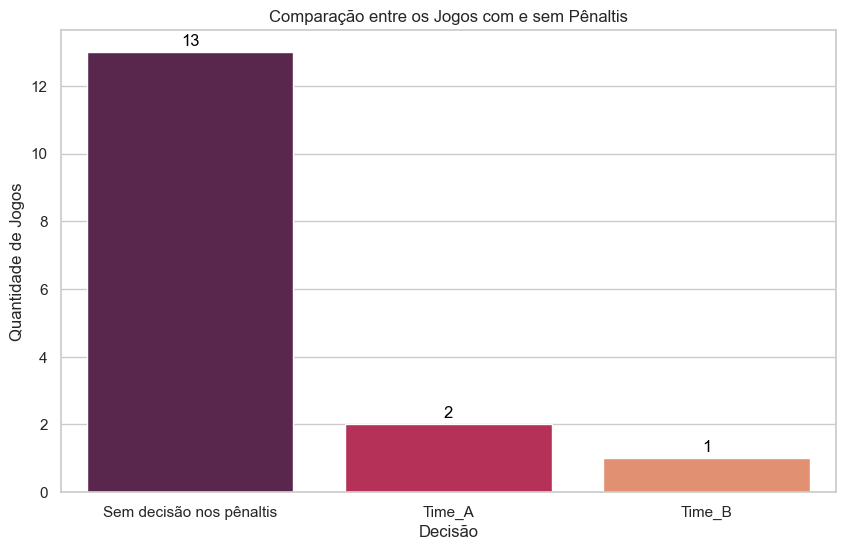

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de jogos que foram para os pênaltis e os que não tiveram
penalty_counts = chave_3_penalt['Vencedor_Penaltis'].value_counts()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')
plt.title('Comparação entre os Jogos com e sem Pênaltis')
plt.xlabel('Decisão')
plt.ylabel('Quantidade de Jogos')

# Adicionar os números centralizados nas barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.show()

In [59]:
time_a = chave_3[['Time_A', 'Gols_A', 'Gols_B']]
time_b = chave_3[['Time_B', 'Gols_B', 'Gols_A']]

In [60]:
time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2057639409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2057639409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


In [61]:
gols_chave_3 = pd.concat([time_a, time_b], ignore_index=True)
gols_chave_3

,Time,Gols Pro,Gols Contra
0,Capital CF,0,2
1,Grêmio Novorizontino,3,0
2,Atlético Goianiense,1,4
3,Ituano,3,0
4,Coimbra-MG,2,4
5,Athletico Paranaense,2,1
6,Fortaleza,0,1
7,Ferroviária,1,2
8,Coritiba,0,0
9,Taubaté,0,2


### Oitavas de final

In [62]:
url_oitavas = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186100'

In [63]:
#Criar df via pandas
oitavas_8 = pd.read_html(url_oitavas, encoding='latin1')
oitavas_8

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


[                    0                         1                         2  \
 0        Liga Inglesa    Erling Haaland 16 Gols         Liverpool +2 Pts.   
 1      Liga Espanhola   Jude Bellingham 16 Gols       Real Madrid +5 Pts.   
 2       Liga Italiana  Lautaro Martínez 19 Gols    Internazionale +7 Pts.   
 3          Bundesliga        Harry Kane 24 Gols  Bayer Leverkusen +5 Pts.   
 4  Campeonato Francês     Kylian Mbappé 20 Gols         Paris SG +11 Pts.   
 
                          3  
 0  2 Empates Menos Empates  
 1  3 Empates Menos Empates  
 2  3 Empates Menos Empates  
 3  1 Empates Menos Empates  
 4  3 Empates Menos Empates  ,
    Unnamed: 0              Unnamed: 1      Unnamed: 2       Unnamed: 3  \
 0  2024/01/16             Corinthians             6-0              CRB   
 1         NaN    Grêmio Novorizontino             3-2        São Paulo   
 2         NaN    Athletico Paranaense             5-3           Grêmio   
 3         NaN                  Ituano           

In [64]:
oitavas = oitavas_8[1]
oitavas

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/16,Corinthians,6-0,CRB,NaN,NaN,NaN,NaN
1,NaN,Grêmio Novorizontino,3-2,São Paulo,NaN,NaN,NaN,NaN
2,NaN,Athletico Paranaense,5-3,Grêmio,NaN,NaN,NaN,NaN
3,NaN,Ituano,1-2,América Mineiro,NaN,NaN,NaN,NaN
4,2024/01/17,Ibrachina FC,1-1 (2-4 Pen.),Coritiba,NaN,NaN,NaN,NaN
5,NaN,Atlético Guaratinguetá,1-2,Aster Itaquá,NaN,NaN,NaN,NaN
6,NaN,Botafogo-SP,1-2,Flamengo,NaN,NaN,NaN,NaN
7,NaN,Santos,0-3,Cruzeiro,NaN,NaN,NaN,NaN


In [65]:
#Renomear as colunas
oitavas.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
oitavas.drop(cols_drop, axis=1, inplace=True)
oitavas_penalt = oitavas.copy()
oitavas

,Time_A,Resultado,Time_B
0,Corinthians,6-0,CRB
1,Grêmio Novorizontino,3-2,São Paulo
2,Athletico Paranaense,5-3,Grêmio
3,Ituano,1-2,América Mineiro
4,Ibrachina FC,1-1 (2-4 Pen.),Coritiba
5,Atlético Guaratinguetá,1-2,Aster Itaquá
6,Botafogo-SP,1-2,Flamengo
7,Santos,0-3,Cruzeiro


In [66]:
#Limpar as informações de Penalts
import re
oitavas['Resultado'] = oitavas['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))
oitavas

,Time_A,Resultado,Time_B
0,Corinthians,6-0,CRB
1,Grêmio Novorizontino,3-2,São Paulo
2,Athletico Paranaense,5-3,Grêmio
3,Ituano,1-2,América Mineiro
4,Ibrachina FC,1-1,Coritiba
5,Atlético Guaratinguetá,1-2,Aster Itaquá
6,Botafogo-SP,1-2,Flamengo
7,Santos,0-3,Cruzeiro


In [67]:
#Separar os gols do time A e do time B para criar o Ranking
oitavas[['Gols_A', 'Gols_B']] = oitavas['Resultado'].str.split('-', expand=True)
display(oitavas)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Corinthians,6-0,CRB,6,0
1,Grêmio Novorizontino,3-2,São Paulo,3,2
2,Athletico Paranaense,5-3,Grêmio,5,3
3,Ituano,1-2,América Mineiro,1,2
4,Ibrachina FC,1-1,Coritiba,1,1
5,Atlético Guaratinguetá,1-2,Aster Itaquá,1,2
6,Botafogo-SP,1-2,Flamengo,1,2
7,Santos,0-3,Cruzeiro,0,3


In [68]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'

    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
oitavas_penalt['Vencedor_Penaltis'] = oitavas_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(oitavas_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Corinthians,6-0,CRB,Sem decisão nos pênaltis
1,Grêmio Novorizontino,3-2,São Paulo,Sem decisão nos pênaltis
2,Athletico Paranaense,5-3,Grêmio,Sem decisão nos pênaltis
3,Ituano,1-2,América Mineiro,Sem decisão nos pênaltis
4,Ibrachina FC,1-1 (2-4 Pen.),Coritiba,Time_B
5,Atlético Guaratinguetá,1-2,Aster Itaquá,Sem decisão nos pênaltis
6,Botafogo-SP,1-2,Flamengo,Sem decisão nos pênaltis
7,Santos,0-3,Cruzeiro,Sem decisão nos pênaltis


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\4199615394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')


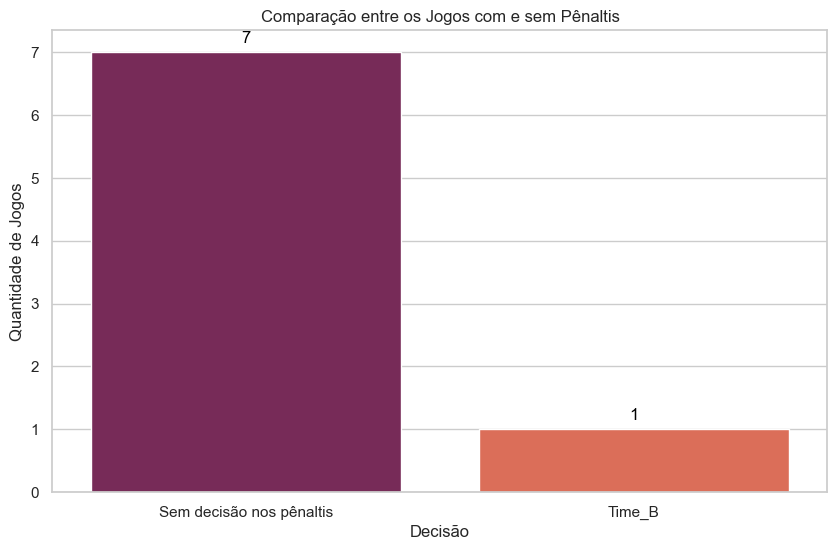

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de jogos que foram para os pênaltis e os que não tiveram
penalty_counts = oitavas_penalt['Vencedor_Penaltis'].value_counts()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')
plt.title('Comparação entre os Jogos com e sem Pênaltis')
plt.xlabel('Decisão')
plt.ylabel('Quantidade de Jogos')

# Adicionar os números centralizados nas barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.show()

In [70]:
time_a = oitavas[['Time_A', 'Gols_A', 'Gols_B']]
time_b = oitavas[['Time_B', 'Gols_B', 'Gols_A']]

time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

gols_oitavas = pd.concat([time_a, time_b], ignore_index=True)
gols_oitavas

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1608428630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1608428630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


,Time,Gols Pro,Gols Contra
0,Corinthians,6,0
1,Grêmio Novorizontino,3,2
2,Athletico Paranaense,5,3
3,Ituano,1,2
4,Ibrachina FC,1,1
5,Atlético Guaratinguetá,1,2
6,Botafogo-SP,1,2
7,Santos,0,3
8,CRB,0,6
9,São Paulo,2,3


### Quartas de final

In [71]:
url_quartas = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186098'

In [72]:
#Criar df via pandas
quartas_4 = pd.read_html(url_quartas, encoding='latin1')
quartas_4

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


[                    0                         1                         2  \
 0        Liga Inglesa    Erling Haaland 16 Gols         Liverpool +2 Pts.   
 1      Liga Espanhola   Jude Bellingham 16 Gols       Real Madrid +5 Pts.   
 2       Liga Italiana  Lautaro Martínez 19 Gols    Internazionale +7 Pts.   
 3          Bundesliga        Harry Kane 24 Gols  Bayer Leverkusen +5 Pts.   
 4  Campeonato Francês     Kylian Mbappé 20 Gols         Paris SG +11 Pts.   
 
                          3  
 0  2 Empates Menos Empates  
 1  3 Empates Menos Empates  
 2  3 Empates Menos Empates  
 3  1 Empates Menos Empates  
 4  3 Empates Menos Empates  ,
    Unnamed: 0            Unnamed: 1      Unnamed: 2            Unnamed: 3  \
 0  2024/01/18  Athletico Paranaense             1-3  Grêmio Novorizontino   
 1         NaN           Corinthians             2-0       América Mineiro   
 2  2024/01/19              Flamengo  1-1 (4-3 Pen.)          Aster Itaquá   
 3         NaN              Cruzeiro 

In [73]:
quartas = quartas_4[1]
quartas

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/18,Athletico Paranaense,1-3,Grêmio Novorizontino,NaN,NaN,NaN,NaN
1,NaN,Corinthians,2-0,América Mineiro,NaN,NaN,NaN,NaN
2,2024/01/19,Flamengo,1-1 (4-3 Pen.),Aster Itaquá,NaN,NaN,NaN,NaN
3,NaN,Cruzeiro,1-0,Coritiba,NaN,NaN,NaN,NaN


In [74]:
#Renomear as colunas
quartas.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
quartas.drop(cols_drop, axis=1, inplace=True)
quartas_penalt = quartas.copy()
quartas

,Time_A,Resultado,Time_B
0,Athletico Paranaense,1-3,Grêmio Novorizontino
1,Corinthians,2-0,América Mineiro
2,Flamengo,1-1 (4-3 Pen.),Aster Itaquá
3,Cruzeiro,1-0,Coritiba


In [75]:
#Limpar as informações de Penalts
import re
quartas['Resultado'] = quartas['Resultado'].apply(lambda x: re.sub(r'\(\d+-\d+ Pen.\)', '', x))
quartas

,Time_A,Resultado,Time_B
0,Athletico Paranaense,1-3,Grêmio Novorizontino
1,Corinthians,2-0,América Mineiro
2,Flamengo,1-1,Aster Itaquá
3,Cruzeiro,1-0,Coritiba


In [76]:
#Separar os gols do time A e do time B para criar o Ranking
quartas[['Gols_A', 'Gols_B']] = quartas['Resultado'].str.split('-', expand=True)
display(quartas)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Athletico Paranaense,1-3,Grêmio Novorizontino,1,3
1,Corinthians,2-0,América Mineiro,2,0
2,Flamengo,1-1,Aster Itaquá,1,1
3,Cruzeiro,1-0,Coritiba,1,0


In [77]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'

    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
quartas_penalt['Vencedor_Penaltis'] = quartas_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(quartas_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Athletico Paranaense,1-3,Grêmio Novorizontino,Sem decisão nos pênaltis
1,Corinthians,2-0,América Mineiro,Sem decisão nos pênaltis
2,Flamengo,1-1 (4-3 Pen.),Aster Itaquá,Time_A
3,Cruzeiro,1-0,Coritiba,Sem decisão nos pênaltis


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3861970787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')


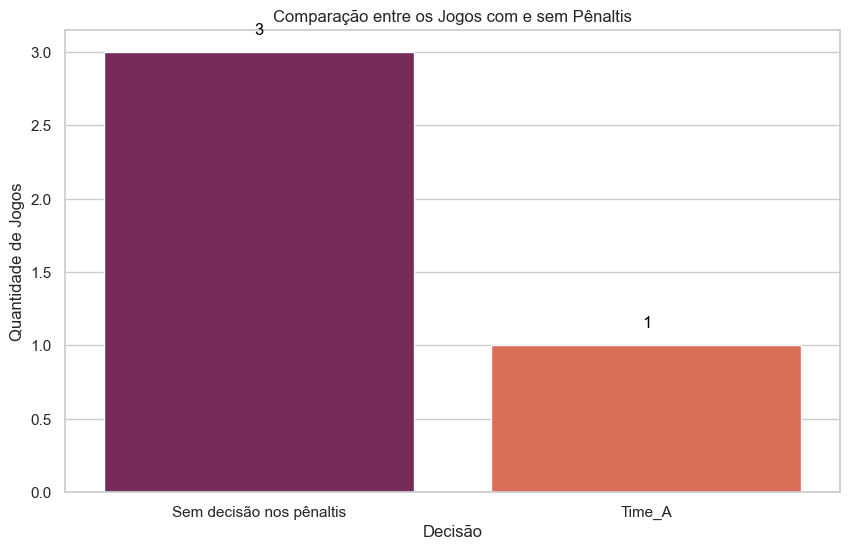

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de jogos que foram para os pênaltis e os que não tiveram
penalty_counts = quartas_penalt['Vencedor_Penaltis'].value_counts()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')
plt.title('Comparação entre os Jogos com e sem Pênaltis')
plt.xlabel('Decisão')
plt.ylabel('Quantidade de Jogos')

# Adicionar os números centralizados nas barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.show()

In [79]:
time_a = quartas[['Time_A', 'Gols_A', 'Gols_B']]
time_b = quartas[['Time_B', 'Gols_B', 'Gols_A']]

time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

gols_quartas = pd.concat([time_a, time_b], ignore_index=True)
gols_quartas

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3682601140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3682601140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


,Time,Gols Pro,Gols Contra
0,Athletico Paranaense,1,3
1,Corinthians,2,0
2,Flamengo,1,1
3,Cruzeiro,1,0
4,Grêmio Novorizontino,3,1
5,América Mineiro,0,2
6,Aster Itaquá,1,1
7,Coritiba,0,1


### Semi final

In [80]:
url_semi = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186097'

In [81]:
#Criar df via pandas
semi_2 = pd.read_html(url_semi, encoding='latin1')
semi_2

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


[                    0                         1                         2  \
 0        Liga Inglesa    Erling Haaland 16 Gols         Liverpool +2 Pts.   
 1      Liga Espanhola   Jude Bellingham 16 Gols       Real Madrid +5 Pts.   
 2       Liga Italiana  Lautaro Martínez 19 Gols    Internazionale +7 Pts.   
 3          Bundesliga        Harry Kane 24 Gols  Bayer Leverkusen +5 Pts.   
 4  Campeonato Francês     Kylian Mbappé 20 Gols         Paris SG +11 Pts.   
 
                          3  
 0  2 Empates Menos Empates  
 1  3 Empates Menos Empates  
 2  3 Empates Menos Empates  
 3  1 Empates Menos Empates  
 4  3 Empates Menos Empates  ,
    Unnamed: 0            Unnamed: 1 Unnamed: 2   Unnamed: 3  Unnamed: 4  \
 0  2024/01/22              Flamengo        1-2     Cruzeiro         NaN   
 1         NaN  Grêmio Novorizontino        0-3  Corinthians         NaN   
 
    Unnamed: 5  Unnamed: 6  Unnamed: 7  
 0         NaN         NaN         NaN  
 1         NaN         NaN         Na

In [82]:
semi = semi_2[1]
semi

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/22,Flamengo,1-2,Cruzeiro,NaN,NaN,NaN,NaN
1,NaN,Grêmio Novorizontino,0-3,Corinthians,NaN,NaN,NaN,NaN


In [83]:
#Renomear as colunas
semi.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
semi.drop(cols_drop, axis=1, inplace=True)
semi_penalt = semi.copy()
semi

,Time_A,Resultado,Time_B
0,Flamengo,1-2,Cruzeiro
1,Grêmio Novorizontino,0-3,Corinthians


In [84]:
#Separar os gols do time A e do time B para criar o Ranking
semi[['Gols_A', 'Gols_B']] = semi['Resultado'].str.split('-', expand=True)
display(semi)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Flamengo,1-2,Cruzeiro,1,2
1,Grêmio Novorizontino,0-3,Corinthians,0,3


In [85]:
# Função para calcular o time vencedor nos pênaltis
def calcular_vencedor_penaltis(resultado):
    # Verifica se a partida foi decidida nos pênaltis
    if 'Pen.' in resultado:
        gols_a, gols_b = map(int, resultado.split('(')[0].strip().split('-'))
        gols_penaltis_a, gols_penaltis_b = map(int, resultado.split('(')[1].replace('Pen.', '').replace(')', '').strip().split('-'))

        if gols_penaltis_a > gols_penaltis_b:
            return 'Time_A'
        elif gols_penaltis_b > gols_penaltis_a:
            return 'Time_B'

    else:
        return 'Sem decisão nos pênaltis'

# Aplica a função para calcular o vencedor nos pênaltis a cada linha do DataFrame
semi_penalt['Vencedor_Penaltis'] = semi_penalt['Resultado'].apply(calcular_vencedor_penaltis)
# Exibe o DataFrame resultante
display(semi_penalt)

,Time_A,Resultado,Time_B,Vencedor_Penaltis
0,Flamengo,1-2,Cruzeiro,Sem decisão nos pênaltis
1,Grêmio Novorizontino,0-3,Corinthians,Sem decisão nos pênaltis


C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\818437312.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')


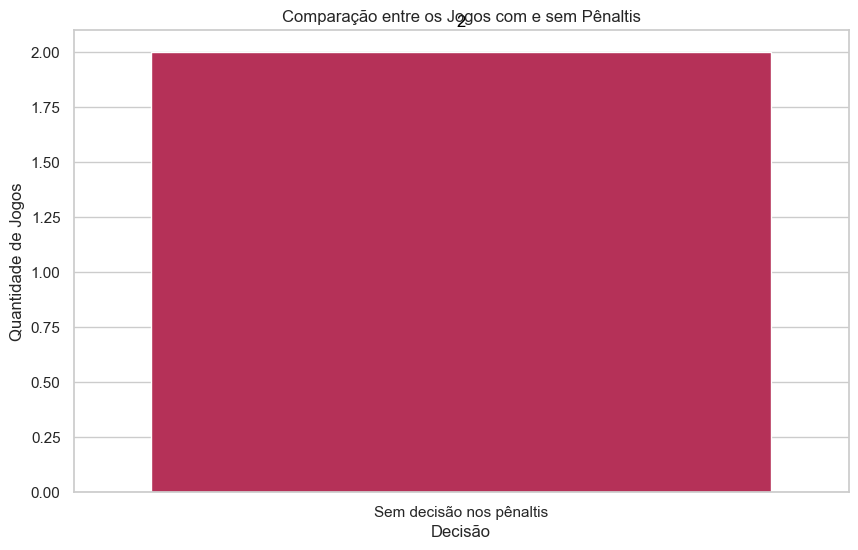

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de jogos que foram para os pênaltis e os que não tiveram
penalty_counts = semi_penalt['Vencedor_Penaltis'].value_counts()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=penalty_counts.index, y=penalty_counts.values, palette='rocket')
plt.title('Comparação entre os Jogos com e sem Pênaltis')
plt.xlabel('Decisão')
plt.ylabel('Quantidade de Jogos')

# Adicionar os números centralizados nas barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.show()

In [87]:
time_a = semi[['Time_A', 'Gols_A', 'Gols_B']]
time_b = semi[['Time_B', 'Gols_B', 'Gols_A']]

time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

gols_semi = pd.concat([time_a, time_b], ignore_index=True)
gols_semi

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3551623448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3551623448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


,Time,Gols Pro,Gols Contra
0,Flamengo,1,2
1,Grêmio Novorizontino,0,3
2,Cruzeiro,2,1
3,Corinthians,3,0


### Final

In [88]:
url_final = 'https://www.ogol.com.br/competicao/copa-sao-paulo-de-futebol-junior?fase=186096'

In [89]:
#Criar df via pandas
final_1 = pd.read_html(url_final, encoding='latin1')
final_1

c:\Users\leojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


[                    0                         1                         2  \
 0        Liga Inglesa    Erling Haaland 16 Gols         Liverpool +2 Pts.   
 1      Liga Espanhola   Jude Bellingham 16 Gols       Real Madrid +5 Pts.   
 2       Liga Italiana  Lautaro Martínez 19 Gols    Internazionale +7 Pts.   
 3          Bundesliga        Harry Kane 24 Gols  Bayer Leverkusen +5 Pts.   
 4  Campeonato Francês     Kylian Mbappé 20 Gols         Paris SG +11 Pts.   
 
                          3  
 0  2 Empates Menos Empates  
 1  3 Empates Menos Empates  
 2  3 Empates Menos Empates  
 3  1 Empates Menos Empates  
 4  3 Empates Menos Empates  ,
    Unnamed: 0   Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4  Unnamed: 5  \
 0  2024/01/25  Corinthians        1-0   Cruzeiro         NaN         NaN   
 
    Unnamed: 6  Unnamed: 7  
 0         NaN         NaN  ,
                                                     0                     1  \
 0                                             CAMPEÃO

In [90]:
final = final_1[1]
final

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024/01/25,Corinthians,1-0,Cruzeiro,NaN,NaN,NaN,NaN


In [91]:
#Renomear as colunas
final.rename(columns={'Unnamed: 1': 'Time_A', 'Unnamed: 2': 'Resultado', 'Unnamed: 3': 'Time_B'}, inplace=True)
#Excluir Colunas
cols_drop = ['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
final.drop(cols_drop, axis=1, inplace=True)
final_penalt = final.copy()
final

,Time_A,Resultado,Time_B
0,Corinthians,1-0,Cruzeiro


In [93]:
#Separar os gols do time A e do time B para criar o Ranking
final[['Gols_A', 'Gols_B']] = final['Resultado'].str.split('-', expand=True)
display(final)

,Time_A,Resultado,Time_B,Gols_A,Gols_B
0,Corinthians,1-0,Cruzeiro,1,0


In [94]:
time_a = final[['Time_A', 'Gols_A', 'Gols_B']]
time_b = final[['Time_B', 'Gols_B', 'Gols_A']]

time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)

gols_final = pd.concat([time_a, time_b], ignore_index=True)
gols_final

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3931374342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_a.rename(columns={'Time_A': 'Time', 'Gols_A': 'Gols Pro', 'Gols_B': 'Gols Contra'}, inplace=True)
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\3931374342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_b.rename(columns={'Time_B': 'Time', 'Gols_B': 'Gols Pro', 'Gols_A': 'Gols Contra'}, inplace=True)


,Time,Gols Pro,Gols Contra
0,Corinthians,1,0
1,Cruzeiro,0,1


### Analise final

In [95]:
gols_fase_grupos = copinha[['Time', 'Gols Pro', 'Gols Sofrido']]
gols_fase_grupos.rename(columns={'Time': 'Time', 'Gols Pro': 'Gols Pro','Gols Sofrido': 'Gols Contra'}, inplace=True)
gols_fase_grupos

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\4103266731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gols_fase_grupos.rename(columns={'Time': 'Time', 'Gols Pro': 'Gols Pro','Gols Sofrido': 'Gols Contra'}, inplace=True)


,Time,Gols Pro,Gols Contra
112,Grêmio,18,2
32,Palmeiras,15,1
24,Santos,12,1
20,Portuguesa,10,1
4,Coritiba,9,0
...,...,...,...
23,União Suzano,2,10
67,Rio Branco-AC,0,9
15,Potyguar Seridoense,0,10
83,Santa Cruz Riachuelo,1,12


In [96]:
#Concatenar todos os dfs de gols para a analise final
all_data = pd.concat([gols_fase_grupos, gols_pri_mata, gols_chave_3, gols_oitavas, 
                      gols_quartas, gols_semi, gols_final], ignore_index=True)


## Erro proposital

In [97]:
df_final = all_data.groupby('Time').agg({'Gols Pro': 'sum', 'Gols Contra': 'sum'}).reset_index()
df_final

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [98]:
#Verificando o tipo de dados
print(all_data.dtypes)


Time           object
Gols Pro       object
Gols Contra    object
dtype: object


In [99]:
all_data['Gols Pro'] = pd.to_numeric(all_data['Gols Pro'], errors='coerce')
all_data['Gols Contra'] = pd.to_numeric(all_data['Gols Contra'], errors='coerce')

In [100]:
print(all_data.dtypes)

Time           object
Gols Pro        int64
Gols Contra     int64
dtype: object


In [101]:
df_final = all_data.groupby('Time').agg({'Gols Pro': 'sum', 'Gols Contra': 'sum'}).reset_index()
df_final = df_final.sort_values(by='Gols Pro', ascending=False).reset_index(drop=True)
df_final['Saldo de Gols'] = df_final['Gols Pro'] - df_final['Gols Contra']
display(df_final)

,Time,Gols Pro,Gols Contra,Saldo de Gols
0,Grêmio,29,10,19
1,Corinthians,25,3,22
2,Santos,20,6,14
3,Cruzeiro,19,3,16
4,Palmeiras,18,3,15
...,...,...,...,...
119,Remo,1,6,-5
120,Tupã,0,7,-7
121,Rio Branco-AC,0,9,-9
122,Lemense,0,6,-6


### Gerando Insights

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1629509315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_gp, x='Time', y='Gols Pro', palette='icefire')
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1629509315.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


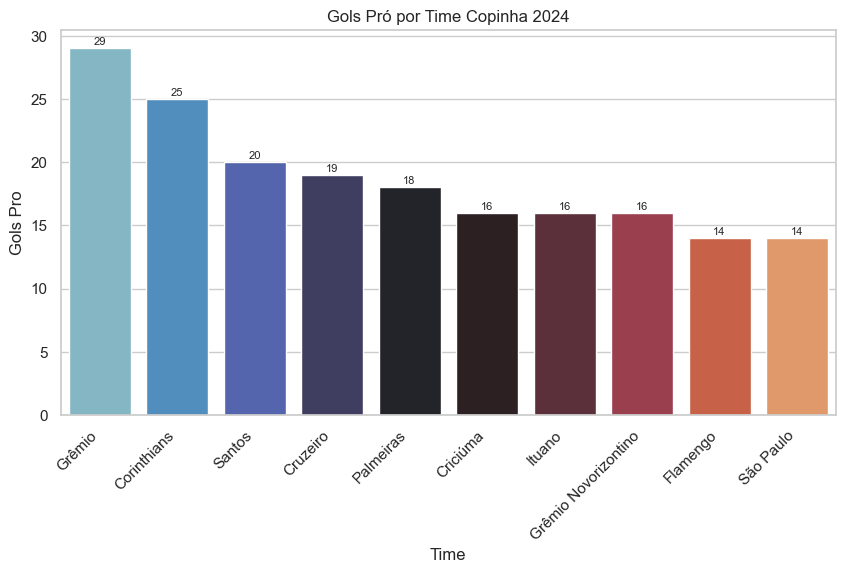

In [102]:
# Criar o gráfico usando seaborn
#Gols Pró
top_gp = df_final.sort_values(by='Gols Pro', ascending=False).head(10)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_gp, x='Time', y='Gols Pro', palette='icefire')  

# Adicionar título ao gráfico
plt.title('Gols Pró por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_gp['Gols Pro']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

# Exibir o gráfico
plt.show()

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2737530853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_gc, x='Time', y='Gols Contra', palette='dark')
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\2737530853.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


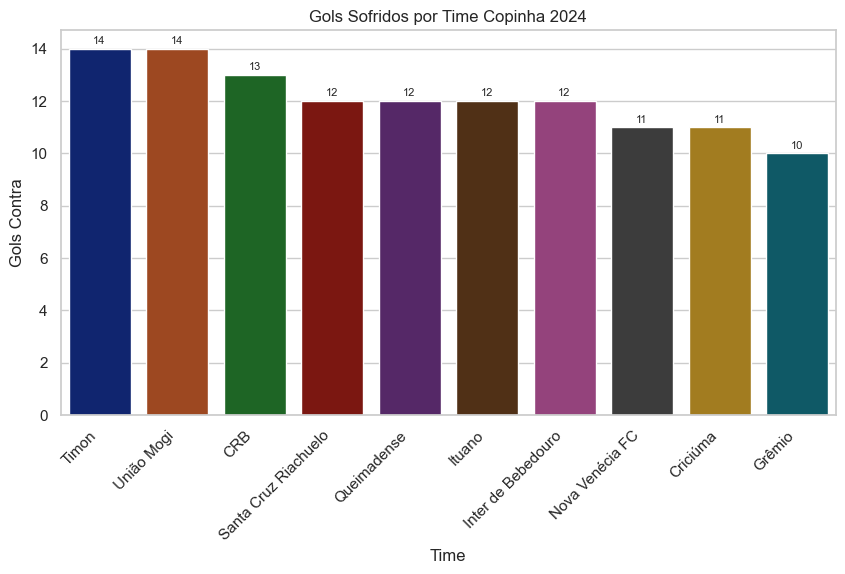

In [103]:
# Criar o gráfico usando seaborn
#Gols Sofridos

top_gc = df_final.sort_values(by='Gols Contra', ascending=False).head(10)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_gc, x='Time', y='Gols Contra', palette='dark')  

# Adicionar título ao gráfico
plt.title('Gols Sofridos por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_gc['Gols Contra']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Exibir o gráfico
plt.show()

C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1694595128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_sg, x='Time', y='Saldo de Gols', palette='Spectral')
C:\Users\leojo\AppData\Local\Temp\ipykernel_19060\1694595128.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


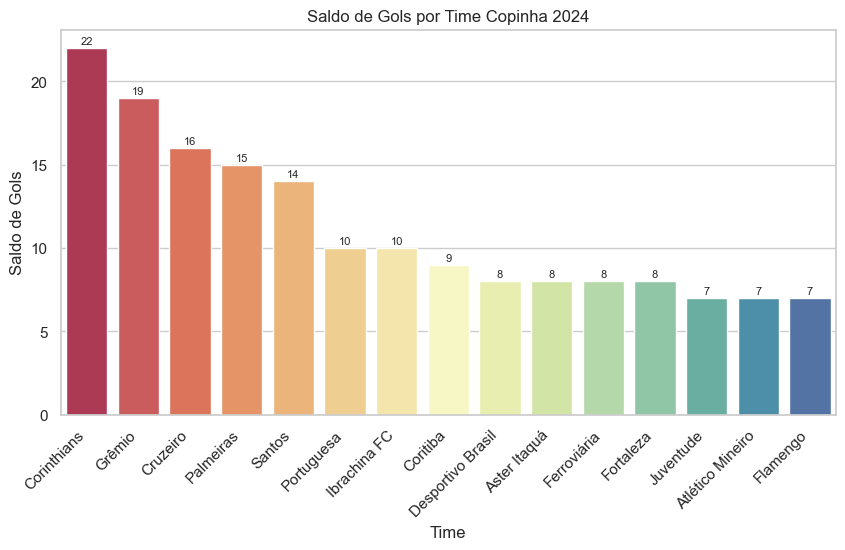

In [104]:
# Criar o gráfico usando seaborn
#Saldo de Gols

top_sg = df_final.sort_values(by='Saldo de Gols', ascending=False).head(15)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=top_sg, x='Time', y='Saldo de Gols', palette='Spectral')  

# Adicionar título ao gráfico
plt.title('Saldo de Gols por Time Copinha 2024')

# Rotacionar os rótulos no eixo x para facilitar a leitura
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar os rótulos com o número de gols em cima das barras
for index, value in enumerate(top_sg['Saldo de Gols']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Exibir o gráfico
plt.show()

### Plus - Craques mais valorizados

In [ ]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
import pandas as pd
from time import sleep
from termcolor import colored as corzinha
from bs4 import BeautifulSoup
import re

In [ ]:
options = Options()
service = executable_path=FirefoxService(GeckoDriverManager().install())
url = 'https://www.transfermarkt.com.br/copa-sao-paulo-de-futebol-junior/marktwertaenderungen/pokalwettbewerb/SPjr/pos//detailpos/0/land_id/0/plus/1'
options = webdriver.FirefoxOptions()
options.headless = True
driver = webdriver.Firefox(options=options, service=service)
driver.get(url)
driver.maximize_window()
#driver.implicitly_wait(10)
ac = ActionChains(driver)

In [ ]:
#Trocar de frame para aceitar o termo
driver.switch_to.frame(1)
button = driver.find_element(By.XPATH, "//button[contains(.,'Aceitar e continuar')]")
button.click()
sleep(3)
driver.switch_to.default_content()

In [ ]:
Jogadores = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr[2]/td[2]")
Posicao = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[2]/table/tbody/tr[2]/td")
Nac = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[3]/img")
Idade = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[4]")
Clube = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[5]/a/img")
Valor_mercado = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[6]")
Dia_Alteracao = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[7]")
Diferenca = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[8]")
Porcentagem = driver.find_element(By.XPATH,"//div[@id='yw1']/table/tbody/tr/td[9]")
ultimo = driver.find_element(By.XPATH,"//div[@id='yw1']/div[2]/ul/li[8]/a")
primeiro = driver.find_element(By.XPATH,"//div[@id='yw1']/div[2]/ul/li[3]/a")
tabela = driver.find_element(By.XPATH,"/html/body/div/main/div[2]/div/div/div[3]/div/table")

In [ ]:
ultimo.click()

In [ ]:
# Obter o conteúdo da página após o carregamento completo
html_content = driver.page_source
# Analisar o conteúdo HTML com BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')


numero_linha = int(re.search(".*zentriert\">(.*)</td>", str(soup)).group(1))
numero_linha

126

In [ ]:
re.search(".*<a title=\"(.*)\" href=", str(soup)).group(1)

AttributeError: 'NoneType' object has no attribute 'group'

: 

In [ ]:


# Listas para armazenar os dados
numbers = []
names = []
positions = []
ages = []
clubs = []
values = []
dates = []
previous_values = []
career_highs = []

# Itere sobre as linhas e extraia os dados
for row in rows:
    number = row.find('td', {'class': 'zentriert'})
    if number:
        numbers.append(int(number.text.strip()))
    else:
        numbers.append(None)

    name = row.find('a', {'class': 'hauptlink'})
    if name:
        names.append(name.text.strip())
    else:
        names.append(None)

    position = row.find_all('td', {'class': None})
    if position and len(position) >= 2:
        positions.append(position[1].text.strip())
    else:
        positions.append(None)

    age = row.find_all('td', {'class': 'zentriert'})
    if age and len(age) >= 3:
        ages.append(int(age[2].text.strip()))
    else:
        ages.append(None)

    club = row.find_all('td', {'class': 'zentriert'})
    if club and len(club) >= 4:
        clubs.append(club[3].text.strip())
    else:
        clubs.append(None)

    value = row.find('td', {'class': 'rechts hauptlink'})
    if value:
        values.append(value.text.strip())
    else:
        values.append(None)

    date = row.find_all('td', {'class': 'rechts'})
    if date and len(date) >= 2:
        dates.append(date[1].text.strip())
    else:
        dates.append(None)

    previous_value = row.find_all('td', {'class': 'rechts'})
    if previous_value and len(previous_value) >= 3:
        previous_values.append(previous_value[2].text.strip())
    else:
        previous_values.append(None)

    career_high = row.find_all('td', {'class': 'rechts greentext'})
    if career_high and len(career_high) >= 2:
        career_highs.append(career_high[1].text.strip())
    else:
        career_highs.append(None)

# Crie um DataFrame pandas com os dados
df = pd.DataFrame({
    'Number': numbers,
    'Name': names,
    'Position': positions,
    'Age': ages,
    'Club': clubs,
    'Value': values,
    'Date': dates,
    'Previous Value': previous_values,
    'Career High': career_highs
})

# Imprima o DataFrame
print(df)

    Number  Name                                           Position   Age  \
0      NaN  None  Todas as posições\nGoleiro\nDefensores\nMeias\...   NaN   
1      NaN  None  Todas as posições\nGoleiro\nLíbero\nZagueiro\n...   NaN   
2      NaN  None  Todos os países participantes\nBrasil\nTodos o...   NaN   
3      NaN  None                                               None   NaN   
4    126.0  None                                                     18.0   
5      NaN  None                                               None   NaN   
6      NaN  None                                               None   NaN   
7    127.0  None                                                     19.0   
8      NaN  None                                               None   NaN   
9      NaN  None                                               None   NaN   
10   128.0  None                                                     21.0   
11     NaN  None                                               None   NaN   

In [ ]:
row.find('a', {'title': re.compile('.*')})

In [ ]:
display(df)

,Number,Name,Position,Age,Club,Value,Date,Previous Value,Career High
0,NaN,None,Todas as posições\nGoleiro\nDefensores\nMeias\...,NaN,None,None,None,None,None
1,NaN,None,Todas as posições\nGoleiro\nLíbero\nZagueiro\n...,NaN,None,None,None,None,None
2,NaN,None,Todos os países participantes\nBrasil\nTodos o...,NaN,None,None,None,None,None
3,NaN,None,None,NaN,None,None,None,None,None
4,126.0,None,,18.0,,50 mil €,02/06/2023,-,None
5,NaN,None,None,NaN,None,None,None,None,None
6,NaN,None,None,NaN,None,None,None,None,None
7,127.0,None,,19.0,,"1,00 mi. €",07/04/2023,-,None
8,NaN,None,None,NaN,None,None,None,None,None
9,NaN,None,None,NaN,None,None,None,None,None


In [ ]:
rows = soup.find_all('tr')
rows

[<tr>
 <td>Posição:</td>
 <td>
 <div class="inline-select">
 <select class="chzn-select chzn-done" data-placeholder="Selecionar posição" id="selHQE" name="pos" style="display: none;" tabindex="-1">
 <option value="">Todas as posições</option>
 <option value="Torwart">Goleiro</option>
 <option value="Abwehr">Defensores</option>
 <option value="Mittelfeld">Meias</option>
 <option value="Sturm">Atacantes</option>
 </select><div class="chzn-container chzn-container-single" id="selHQE_chzn" style="width: 100%;" title=""><a class="chzn-single" href="javascript:void(0)" tabindex="-1"><span>Todas as posições</span><div><b></b></div></a><div class="chzn-drop"><div class="chzn-search"><input autocomplete="off" tabindex="0" type="search"/></div><ul class="chzn-results"><li class="active-result result-selected" id="selHQE_chzn_o_0" style="">Todas as posições</li><li class="active-result" id="selHQE_chzn_o_1" style="">Goleiro</li><li class="active-result" id="selHQE_chzn_o_2" style="">Defensores</l

In [ ]:
soup
# Inicialize listas para armazenar os dados
numbers = []
names = []
positions = []
ages = []
clubs = []
values = []
dates = []
previous_values = []
career_highs = []

# Encontre todas as linhas (tr) na tabela
rows = soup.find_all('tr')

# Itere sobre as linhas e extraia os dados
for row in rows:
    number = row.find('td', {'class': 'zentriert'})
    if number:
        numbers.append(int(number.text.strip()))

    name = row.find('a', {'class': 'hauptlink'})
    if name:
        names.append(name.text.strip())

    position = row.find_all('td', {'class': None})[1]
    if position:
        positions.append(position.text.strip())

    age = row.find_all('td', {'class': 'zentriert'})[2]
    if age:
        ages.append(int(age.text.strip()))

    club = row.find_all('td', {'class': 'zentriert'})[3]
    if club:
        clubs.append(club.text.strip())

    value = row.find('td', {'class': 'rechts hauptlink'})
    if value:
        values.append(value.text.strip())

    date = row.find_all('td', {'class': 'rechts'})[1]
    if date:
        dates.append(date.text.strip())

    previous_value = row.find_all('td', {'class': 'rechts'})[2]
    if previous_value:
        previous_values.append(previous_value.text.strip())

    career_high = row.find_all('td', {'class': 'rechts greentext'})[1]
    if career_high:
        career_highs.append(career_high.text.strip())

# Crie um DataFrame pandas com os dados
df = pd.DataFrame({
    'Number': numbers,
    'Name': names,
    'Position': positions,
    'Age': ages,
    'Club': clubs,
    'Value': values,
    'Date': dates,
    'Previous Value': previous_values,
    'Career High': career_highs
})

# Imprima o DataFrame
print(df)

IndexError: list index out of range

In [ ]:
number = row.find('td', {'class': 'zentriert'})
number

In [ ]:
for i in soup:
    numero_linha
    print(numero_linha)

126


In [ ]:
numero_linha

126

In [ ]:
html_content = driver.page_source
# Analisar o conteúdo HTML com BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Encontrar a tabela com a classe "items"
table = soup.find('table', {'class': 'items'})

# Encontrar todas as linhas no corpo da tabela
rows = table.tbody.find_all('tr')

# Obter o índice da última linha
last_row_index = len(rows) - 1

# Obter o conteúdo da última linha
last_row = rows[last_row_index]

# Extrair o conteúdo de texto da última linha
last_row_text_content = last_row.get_text(strip=True)

print("Índice da última linha:", last_row_index)
print("Conteúdo da última linha:", last_row_text_content)

Índice da última linha: 11
Conteúdo da última linha: Ponta Direita


In [ ]:
rows

[<tr class="odd">
 <td class="zentriert">126</td><td> <table class="inline-table">
 <tbody><tr>
 <td rowspan="2">
 <img alt="Carlos Gómez" class="bilderrahmen-fixed lazy entered loaded" data-ll-status="loaded" data-src="https://img.a.transfermarkt.technology/portrait/medium/1029758-1688330878.jpg?lm=1" src="https://img.a.transfermarkt.technology/portrait/medium/1029758-1688330878.jpg?lm=1" title="Carlos Gómez"/> </td>
 <td class="hauptlink">
 <a href="/carlos-gomez/profil/spieler/1029758" title="Carlos Gómez">Carlos Gómez</a> </td>
 </tr>
 <tr>
 <td>Lateral Dir.</td>
 </tr>
 </tbody></table>
 </td><td class="zentriert"><img alt="Perú" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/133.png?lm=1520611569" title="Perú"/></td><td class="zentriert">18</td><td class="zentriert"><a href="/ec-cruzeiro-belo-horizonte-u20/startseite/verein/16658/saison_id/2023" title="Cruzeiro EC U20"><img alt="Cruzeiro EC U20" class="" src="https://tmssl.akamaized.net/images/wapp

In [ ]:
# Obter o número da última linha
last_row_number = int(rows[-1].find('tr', {'class': 'even'}).text.strip())


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
jogador_final = 

In [ ]:
while j <= jogador_final

In [ ]:
ultimo.click()

In [ ]:
Numero_linha1 = Numero_linha.text
print(Numero_linha1)

4


In [ ]:
# Navegue até a página que contém a tabela
driver.get("https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/formtabelle/wettbewerb/BRA1?saison_id=2022&min=1&max=1")







# Use o XPath fornecido para localizar o corpo da tabela
table_body_xpath = "//*[@id='main']/main/div[2]/div[1]/div/div[2]/table/tbody"
table_body = driver.find_element(By.XPATH, table_body_xpath)

# Inicialize um DataFrame vazio
df = pd.DataFrame(columns=["Posicao", "Clube", "Rodada", "Vitorias", "Empates", "Derrotas", "Gols", "SG", "Pts"])

# Encontre todas as linhas da tabela no corpo da tabela
rows = table_body.find_elements(By.TAG_NAME, "tr")

for row in rows:
    # Encontre todas as células de dados (td) na linha
    dados = row.find_elements(By.TAG_NAME, "td")

    # Extrair os dados de cada célula e adicionar uma linha ao DataFrame
    df.loc[len(df)] = [dados[0].text, dados[2].text, dados[3].text, dados[4].text, dados[5].text, dados[6].text, dados[7].text, dados[8].text, dados[9].text]

# Imprima o DataFrame
print(df)

<!DOCTYPE html>

<html lang="br">
<head>
<script data-description="sourcepoint stub code" type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.add

In [ ]:
# Primeiro conseguiremos os nomes de cada jogador
nomes_jogadores = [] # Lista ordenada dos nomes de todos os jogadores

# O método find_all() consegue retornar todas as tags que cumprem as restrições dentro dos parênteses
tags_jogadores = pageSoup.find_all("a", {"class": "spielprofil_tooltip"})
# No nosso caso estamos encontrando todas as âncoras com a classe "spielprofil_tooltip"

# Agora iremos conseguir somente os nomes de todos os jogadores
for tag_jogador in tags_jogadores:
    nomes_jogadores.append(tag_jogador.text)

nomes_jogadores

[]

In [ ]:

# Agora partiremos para o país da liga de origem de cada jogador
pais_jogadores = [] # Lista ordenada dos nomes do país da liga de origem de todos os jogadores

tags_ligas = pageSoup.find_all("td",{"class": None})
# Agora iremos receber todas as células da tabela que não possuem classe

for tag_liga in tags_ligas:
    # A função find irá encontrar a primeira imagem cuja classe é "flaggenrahmen" e possui um título
    imagem_pais = tag_liga.find("img", {"class": "flaggenrahmen"}, {"title":True})
    # A variável imagem_país será uma estrutura com todas as informações da imagem,
    # uma delas é o title que contem o nome do país da bandeira
    if(imagem_pais != None): # Testaremos se o método encontrou alguma correspondência
        pais_jogadores.append(imagem_pais['title'])
    

# Por fim iremos conseguir as informacões de custo dos jogadores
custos_jogadores = []

tags_custos = pageSoup.find_all("td", {"class": "rechts hauptlink"})

for tag_custo in tags_custos:
    texto_preco = tag_custo.text
    # O texto do preço contém caracteres que não precisamos como £ (euros) e m (milhão) então iremos retirá-los
    texto_preco = texto_preco.replace("£", "").replace("m","")
    # Converteremos agora o valor para uma variável numérica
    preco_numerico = float(texto_preco)
    custos_jogadores.append(preco_numerico)

# Criando um DataFrame a partir de nossos dados
df = pd.DataFrame({"Jogador":nomes_jogadores,"Preço (milhão de euro)":custos_jogadores,"País de Origem":pais_jogadores})

# Imprimindo os dados que obtemos
print(df)


ValueError: could not convert string to float: '75 il €\xa0\xa0'

In [ ]:
options = Options()
service = executable_path=FirefoxService(GeckoDriverManager().install())
url = 'https://www.transfermarkt.com.br/copa-sao-paulo-de-futebol-junior/marktwerte/pokalwettbewerb/SPjr/pos//detailpos/0/altersklasse/alle'
options = webdriver.FirefoxOptions()
options.headless = True
driver = webdriver.Firefox(options=options, service=service)
driver.get(url)
driver.maximize_window()
#driver.implicitly_wait(10)
ac = ActionChains(driver)

In [ ]:
#Trocar de frame para aceitar o termo
driver.switch_to.frame(1)
button = driver.find_element(By.XPATH, "//button[contains(.,'Aceitar e continuar')]")
button.click()
sleep(3)
driver.switch_to.default_content()

In [ ]:
# Navegue até a página que contém a tabela
driver.get("https://www.transfermarkt.com.br/copa-sao-paulo-de-futebol-junior/marktwerte/pokalwettbewerb/SPjr/pos//detailpos/0/altersklasse/alle")
# Use o XPath fornecido para localizar o corpo da tabela
table_body_xpath = "//div[@id='yw1']/table"
table_body = driver.find_element(By.XPATH, table_body_xpath)

# Inicialize um DataFrame vazio
df = pd.DataFrame(columns=["Jogadores", "Nac.", "Idade", "Clube", "Valor de mercado"])

# Encontre todas as linhas da tabela no corpo da tabela
rows = table_body.find_elements(By.TAG_NAME, "tr")


In [ ]:
rows

[<selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="c88b000a-45dc-489e-8c7b-221a5c6a2e02")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="102d28ca-2339-4a6f-9738-2c7dc57691e3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="39dee464-b81d-401b-940a-9504ce021074")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="b4c79d89-9881-423c-aed8-c020b98837aa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="8781b5e7-1758-46e7-9dd7-5562ea4db0d3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element="eaae94bf-7051-45c5-aa11-33bc381a9c8c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="124fb22a-a98c-47b0-945e-fd13af5b8c7a", element

In [ ]:

for row in rows:
    # Encontre todas as células de dados (td) na linha
    dados = row.find_elements(By.TAG_NAME, "td")

    # Extrair os dados de cada célula e adicionar uma linha ao DataFrame
    df.loc[len(df)] = [dados[0].text, dados[2].text, dados[3].text, dados[4].text, dados[5].text, dados[6].text, dados[7].text, dados[8].text, dados[9].text]

# Imprima o DataFrame
print(df)

IndexError: list index out of range

In [ ]:
pd.read_html(valor)

HTTPError: HTTP Error 403: Forbidden